In [30]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
import random
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from glob import glob
from PIL import Image
from tensorflow.keras import layers, models, regularizers, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from PIL import Image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [3]:
path = "/Users/vishvatejaguduguntla/Downloads/skds"
print(os.listdir(path))

['.DS_Store', 'Test', 'Train']


In [4]:
path_train = "/Users/vishvatejaguduguntla/Downloads/skds/Train"
print(os.listdir(path_train))
classes = os.listdir(path_train)
if '.DS_Store' in classes:
    classes.remove('.DS_Store')
    print(classes)

['.DS_Store', 'melanoma', 'pigmented benign keratosis', 'nevus', 'basal cell carcinoma', 'actinic keratosis', 'squamous cell carcinoma', 'vascular lesion', 'seborrheic keratosis', 'dermatofibroma']
['melanoma', 'pigmented benign keratosis', 'nevus', 'basal cell carcinoma', 'actinic keratosis', 'squamous cell carcinoma', 'vascular lesion', 'seborrheic keratosis', 'dermatofibroma']


In [5]:
path_test = "/Users/vishvatejaguduguntla/Downloads/skds/Test"
print(os.listdir(path_test))

['.DS_Store', 'melanoma', 'pigmented benign keratosis', 'nevus', 'basal cell carcinoma', 'actinic keratosis', 'squamous cell carcinoma', 'vascular lesion', 'seborrheic keratosis', 'dermatofibroma']


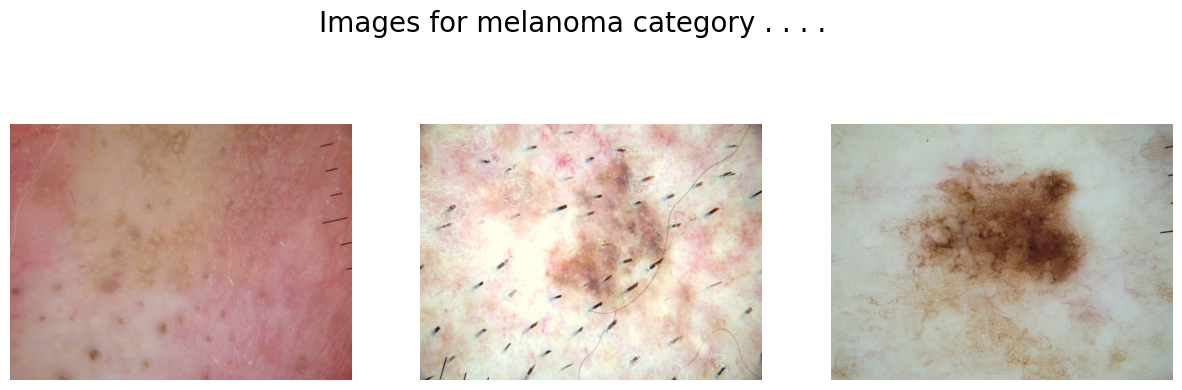

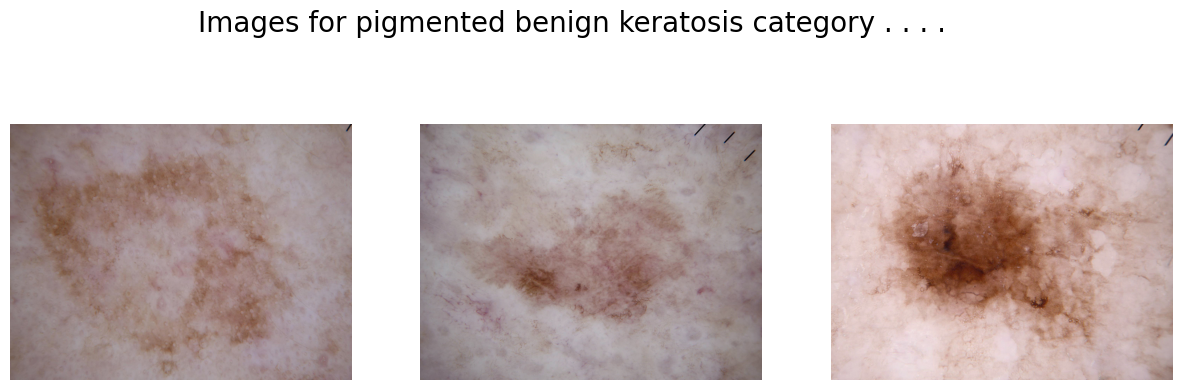

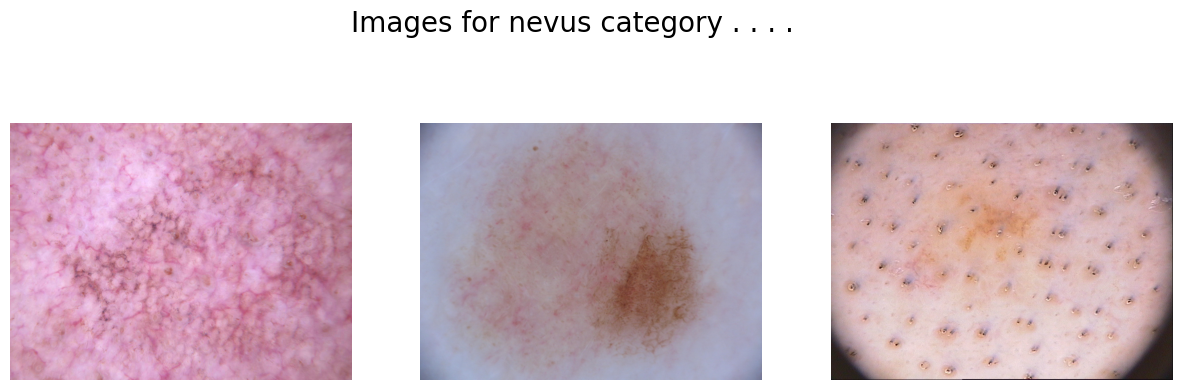

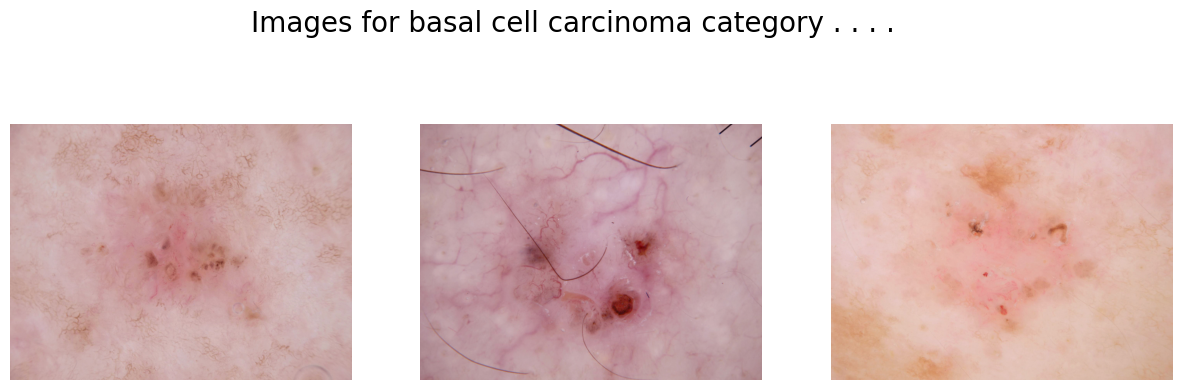

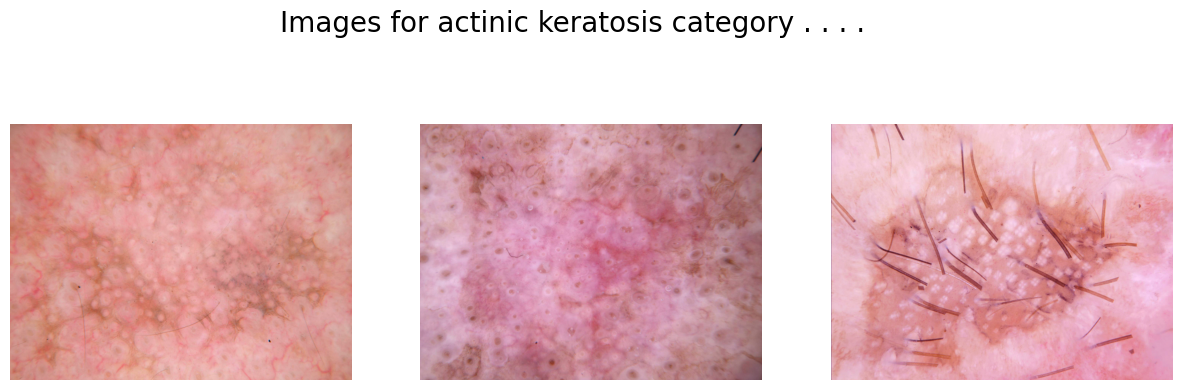

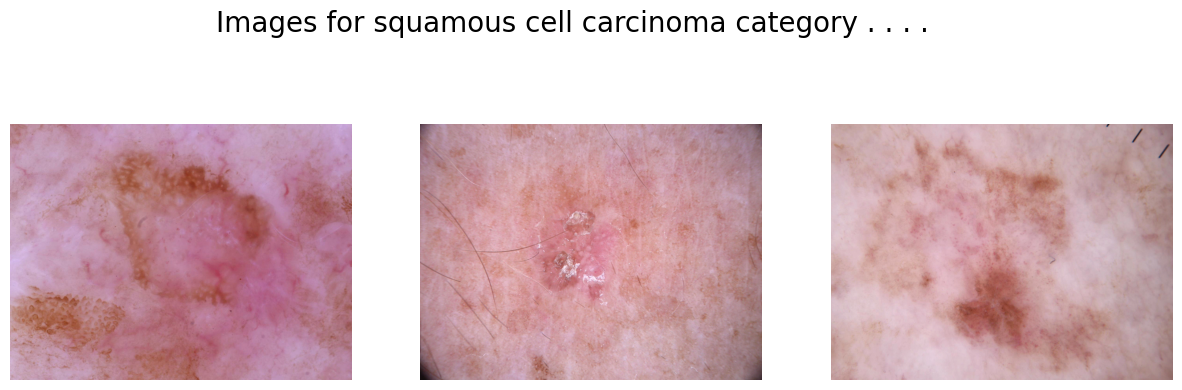

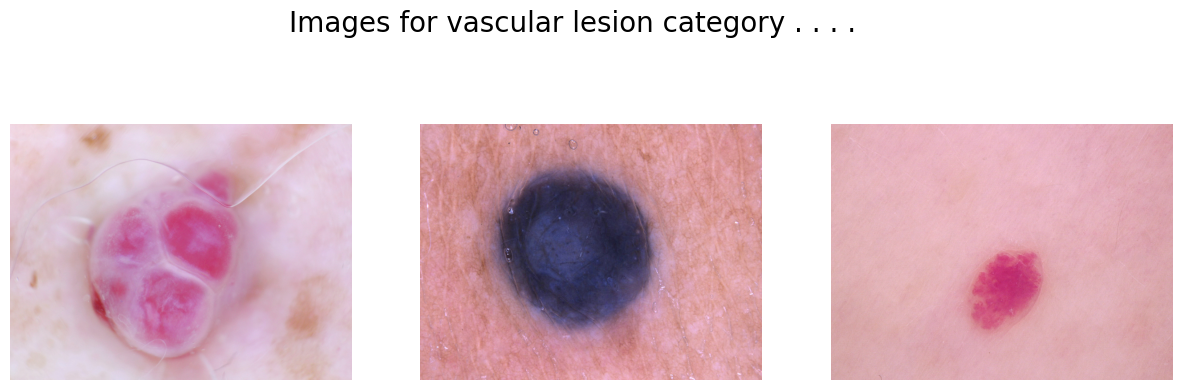

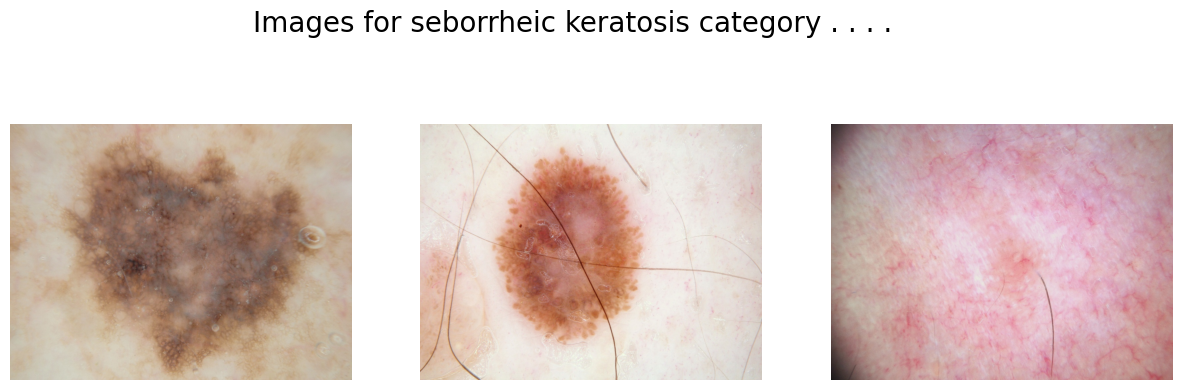

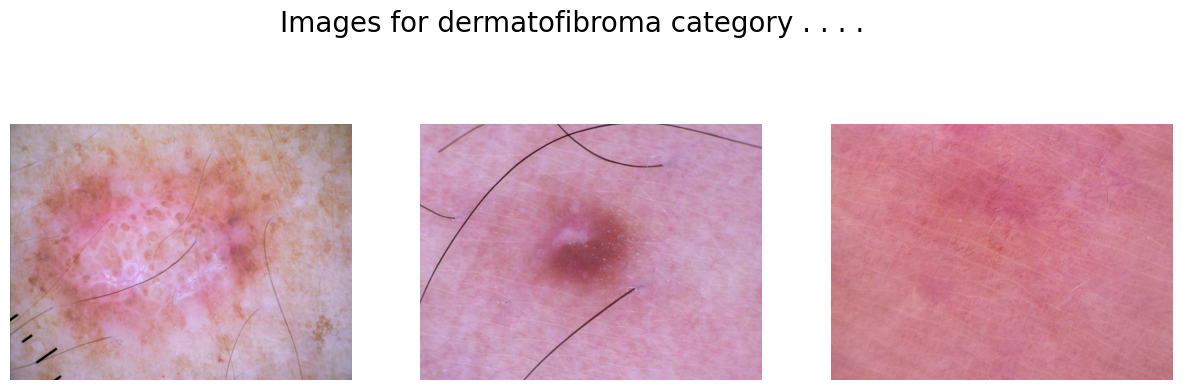

In [6]:
for cat in classes:
    if cat != ".DS_Store" and os.path.isdir(os.path.join(path_train, cat)):
        image_dir = os.path.join(path_train, cat)
        images = os.listdir(image_dir)
        images = [img for img in images if os.path.isfile(os.path.join(image_dir, img))]
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))
        fig.suptitle(f'Images for {cat} category . . . .', fontsize=20)

        for i in range(3):
            if images:
                k = np.random.randint(0, len(images))
                img = np.array(Image.open(f'{path_train}/{cat}/{images[k]}'))
                ax[i].imshow(img)
                ax[i].axis('off')
            else:
                print(f"No images found in directory: {image_dir}")
        plt.show()

In [7]:
# Skin cancer class folders (replace 'Downloads' path with your actual local path)
train_folder = [
    "/Users/vishvatejaguduguntla/Downloads/skds/Train/actinic keratosis",
    "/Users/vishvatejaguduguntla/Downloads/skds/Train/basal cell carcinoma",
    "/Users/vishvatejaguduguntla/Downloads/skds/Train/dermatofibroma",
    "/Users/vishvatejaguduguntla/Downloads/skds/Train/melanoma",
    "/Users/vishvatejaguduguntla/Downloads/skds/Train/nevus",
    "/Users/vishvatejaguduguntla/Downloads/skds/Train/pigmented benign keratosis",
    "/Users/vishvatejaguduguntla/Downloads/skds/Train/seborrheic keratosis",
    "/Users/vishvatejaguduguntla/Downloads/skds/Train/squamous cell carcinoma",
    "/Users/vishvatejaguduguntla/Downloads/skds/Train/vascular lesion"
]

test_folder = [
    "/Users/vishvatejaguduguntla/Downloads/skds/Test/actinic keratosis",
    "/Users/vishvatejaguduguntla/Downloads/skds/Test/basal cell carcinoma",
    "/Users/vishvatejaguduguntla/Downloads/skds/Test/dermatofibroma",
    "/Users/vishvatejaguduguntla/Downloads/skds/Test/melanoma",
    "/Users/vishvatejaguduguntla/Downloads/skds/Test/nevus",
    "/Users/vishvatejaguduguntla/Downloads/skds/Test/pigmented benign keratosis",
    "/Users/vishvatejaguduguntla/Downloads/skds/Test/seborrheic keratosis",
    "/Users/vishvatejaguduguntla/Downloads/skds/Test/squamous cell carcinoma",
    "/Users/vishvatejaguduguntla/Downloads/skds/Test/vascular lesion"
]

IMG_SIZE = 128  # You can also try 224 for ResNet/Inception
X_train, Y_train, X_test, Y_test = [], [], [], []


In [8]:
for i,train_path in  enumerate(train_folder):
  images = glob(f"{train_path}/*.*")
  print(f"Found {len(images)} images in {train_path}")

  for img in images:
    img = cv2.imread(img)
    img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    X_train.append(img)
    Y_train.append(i)

Found 114 images in /Users/vishvatejaguduguntla/Downloads/skds/Train/actinic keratosis
Found 376 images in /Users/vishvatejaguduguntla/Downloads/skds/Train/basal cell carcinoma
Found 95 images in /Users/vishvatejaguduguntla/Downloads/skds/Train/dermatofibroma
Found 438 images in /Users/vishvatejaguduguntla/Downloads/skds/Train/melanoma
Found 357 images in /Users/vishvatejaguduguntla/Downloads/skds/Train/nevus
Found 462 images in /Users/vishvatejaguduguntla/Downloads/skds/Train/pigmented benign keratosis
Found 77 images in /Users/vishvatejaguduguntla/Downloads/skds/Train/seborrheic keratosis
Found 181 images in /Users/vishvatejaguduguntla/Downloads/skds/Train/squamous cell carcinoma
Found 139 images in /Users/vishvatejaguduguntla/Downloads/skds/Train/vascular lesion


In [9]:
for i,test_path in  enumerate(test_folder):
  images = glob(f"{test_path}/*.*")
  print(f"Found {len(images)} images in {test_path}")

  for img in images:
    img = cv2.imread(img)
    img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    X_test.append(img)
    Y_test.append(i)

Found 16 images in /Users/vishvatejaguduguntla/Downloads/skds/Test/actinic keratosis
Found 16 images in /Users/vishvatejaguduguntla/Downloads/skds/Test/basal cell carcinoma
Found 16 images in /Users/vishvatejaguduguntla/Downloads/skds/Test/dermatofibroma
Found 16 images in /Users/vishvatejaguduguntla/Downloads/skds/Test/melanoma
Found 16 images in /Users/vishvatejaguduguntla/Downloads/skds/Test/nevus
Found 16 images in /Users/vishvatejaguduguntla/Downloads/skds/Test/pigmented benign keratosis
Found 3 images in /Users/vishvatejaguduguntla/Downloads/skds/Test/seborrheic keratosis
Found 16 images in /Users/vishvatejaguduguntla/Downloads/skds/Test/squamous cell carcinoma
Found 3 images in /Users/vishvatejaguduguntla/Downloads/skds/Test/vascular lesion


In [10]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [11]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)

X_train = X_train / 255.0
X_test = X_test / 255.0

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (2239, 128, 128, 3)
Y_train shape: (2239,)
X_test shape: (118, 128, 128, 3)
Y_test shape: (118,)


In [12]:
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=9)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes=9)

print("Y_train one-hot shape:", Y_train.shape)
print("Y_test one-hot shape:", Y_test.shape)

Y_train one-hot shape: (2239, 9)
Y_test one-hot shape: (118, 9)


In [46]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)),  # input matches your image shape
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')  # num_classes = 9
])


In [47]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    X_train,Y_train,
    epochs=20
)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 18s 245ms/step - accuracy: 0.2305 - loss: 2.0384
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 20s 281ms/step - accuracy: 0.3206 - loss: 1.8242
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 19s 276ms/step - accuracy: 0.4506 - loss: 1.6158
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 19s 268ms/step - accuracy: 0.4497 - loss: 1.5329
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 18s 256ms/step - accuracy: 0.5002 - loss: 1.4127
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 19s 278ms/step - accuracy: 0.5222 - loss: 1.3443
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 18s 250ms/step - accuracy: 0.5487 - loss: 1.3319
Epoch 8/20
33/70 ━━━━━━━━━━━━━━━━━━━━ 8s 240ms/step - accuracy: 0.5471 - loss: 1.3144

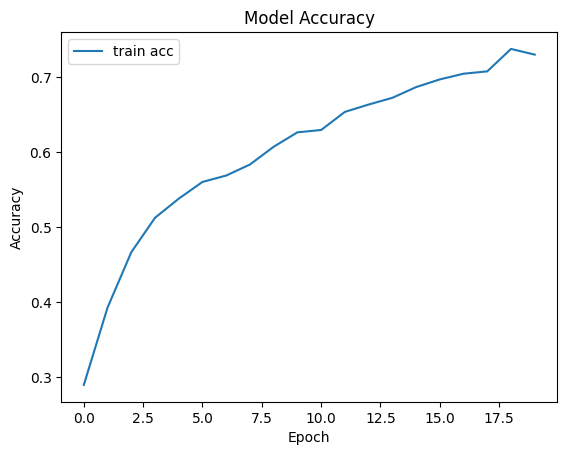

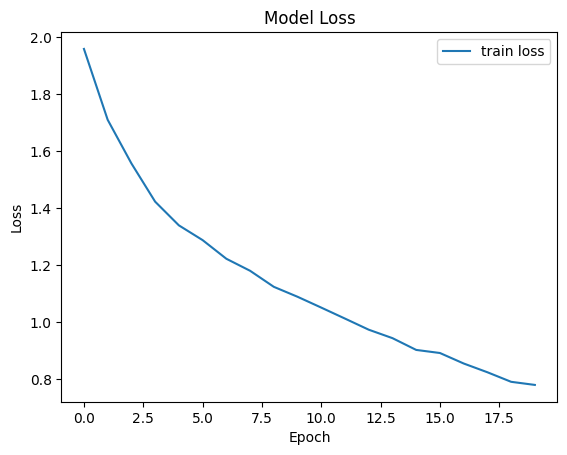

In [25]:

plt.plot(history.history['accuracy'], label='train acc')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='train loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.62      0.31      0.42        16
     Class 1       0.27      0.44      0.33        16
     Class 2       0.25      0.06      0.10        16
     Class 3       0.22      0.25      0.24        16
     Class 4       0.39      0.81      0.53        16
     Class 5       0.61      0.69      0.65        16
     Class 6       0.00      0.00      0.00         3
     Class 7       0.50      0.19      0.27        16
     Class 8       0.40      0.67      0.50         3

    accuracy                           0.39       118
   macro avg       0.36      0.38      0.34       118
weighted avg       0.40      0.39      0.36       118



/opt/anaconda3/envs/cancer_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cancer_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cancer_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

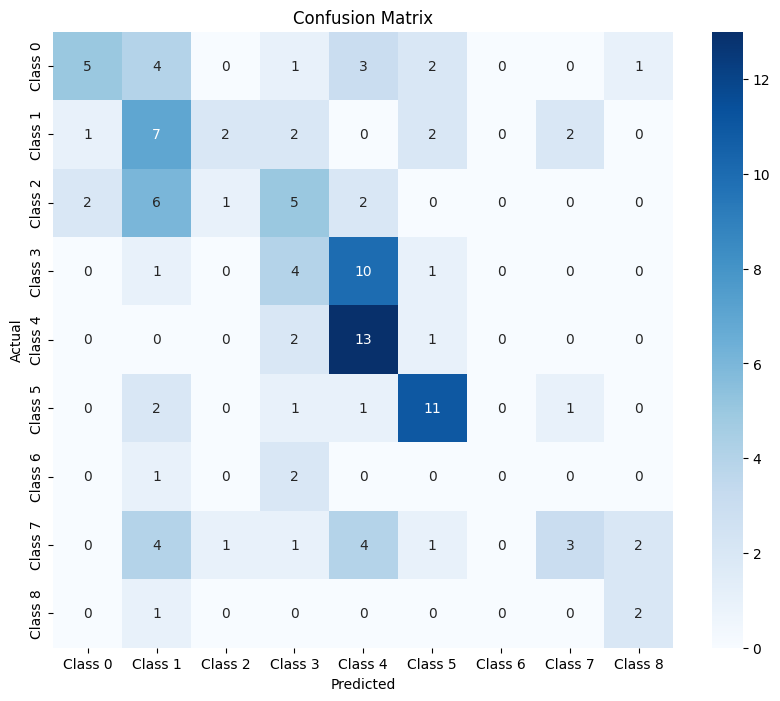

In [31]:
if len(Y_test.shape) > 1 and Y_test.shape[1] > 1:
    Y_true = np.argmax(Y_test, axis=1)
else:
    Y_true = Y_test


Y_pred_probs = model.predict(X_test)
Y_pred = np.argmax(Y_pred_probs, axis=1)

# Set class labels (update these based on your dataset)
class_labels = [f"Class {i}" for i in range(Y_pred_probs.shape[1])]  # or actual class names

# Classification Report
print("Classification Report:")
print(classification_report(Y_true, Y_pred, target_names=class_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_true, Y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [40]:
model.save('model.h5')


In [39]:
pip install gradio


  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached python_multipart-0.0.20-py3-none-any.whl.metadata (1.8 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl.metadata (9.7 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 MB 22.4 MB/s eta 0:00:0000:0100:01
Using cached semantic_version-2.10.0-py2.py3-none-any.whl (15 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 44.4 MB/s eta 0:00:00
Using cached python_multipart-0.0.20-py3-none-any.whl (24 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 49.1 MB/s eta 0:00:0000:01
Using cached shellingham-1.5.4-py2.py3-none-any.whl (9.8 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached filelock-3.18.0-py3-none-any.whl (16 kB)
Using cached pydub-0.25.1-py2.py3-none-

In [41]:
import gradio as gr
import tensorflow as tf
import numpy as np
from PIL import Image

# Load your trained model
model = tf.keras.models.load_model("model.h5")

# List of class labels
class_names = [f"Class {i}" for i in range(9)]  # Replace with actual names if available

# Preprocessing + Prediction
def predict(img):
    img = img.resize((224, 224))  # Change to your model's input shape
    img_array = np.expand_dims(np.array(img) / 255.0, axis=0)
    preds = model.predict(img_array)
    pred_class = class_names[np.argmax(preds)]
    return pred_class

# Interface: Image input, label output
demo = gr.Interface(fn=predict, 
                    inputs=gr.Image(type="pil"), 
                    outputs="label",
                    title="Cancer Image Classifier")

if __name__ == "__main__":
    demo.launch()


/opt/anaconda3/envs/cancer_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "/opt/anaconda3/envs/cancer_env/lib/python3.10/site-packages/gradio/queueing.py", line 625, in process_events
    response = await route_utils.call_process_api(
  File "/opt/anaconda3/envs/cancer_env/lib/python3.10/site-packages/gradio/route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
  File "/opt/anaconda3/envs/cancer_env/lib/python3.10/site-packages/gradio/blocks.py", line 2220, in process_api
    result = await self.call_function(
  File "/opt/anaconda3/envs/cancer_env/lib/python3.10/site-packages/gradio/blocks.py", line 1731, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
  File "/opt/anaconda3/envs/cancer_env/lib/python3.10/site-packages/anyio/to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
  File "/opt/anaconda3/envs/cancer_env/lib/python3.10/site-packages/anyio/_backends/_asyncio.py", line 2470, in run_sync